## <font color=red>BY PRINCE K


# <center> <font color=red> Task-1: UBER DATA ANALYSIS


### Dataset:  My Uber Drives (2016)
### The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.) is taken from kaggle.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Data Exploration </b></font>



In [2]:
uber_df = pd.read_csv("/kaggle/input/uberdrives/My Uber Drives - 2016.csv")

In [3]:
# First 5 records 
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
# Last 5 records 
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
# The  shape and size of data 
print(uber_df.shape)
print (uber_df.size)

(1156, 7)
8092


* The dataset has 1156 rows and 7 columns . The total size of the dataset is 8092

In [6]:
# Columns names 
uber_df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [7]:
# Data  type of the columns 

uber_df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [8]:
#get more information about data
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**The dataset has 1 numerical variable and 6 categorical variables** <br>
**The "PURPOSE" column has many missing values**

In [9]:
# Check the missing values 
uber_df.isnull().any()


START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [10]:
#Get the number of missing values in each column
uber_df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

**From the above it is clear that is there is one null data which needs**

In [11]:
uber_df[uber_df['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [12]:
uber_df.drop(uber_df.index[1155],inplace=True)


In [13]:
#Duplicated Records needs to be removed 

uber_df[uber_df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [14]:
# Dropping the duplicates values 

uber_df.drop_duplicates(inplace=True)


In [15]:
# Get the initial data with dropping the NA values
uber_df = uber_df.dropna()

#Get the shape of the dataframe after removing the null values
uber_df.shape

(652, 7)

**The dataset now contains 653 rows of non-null values**

In [16]:
#get the summary of data
uber_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,652.0,11.198313,23.00402,0.5,3.2,6.4,10.4,310.3


- This miles column is rightly skewed ( as we have mean > median)
- The ride ranges from 0.5 miles 310.3 miles

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


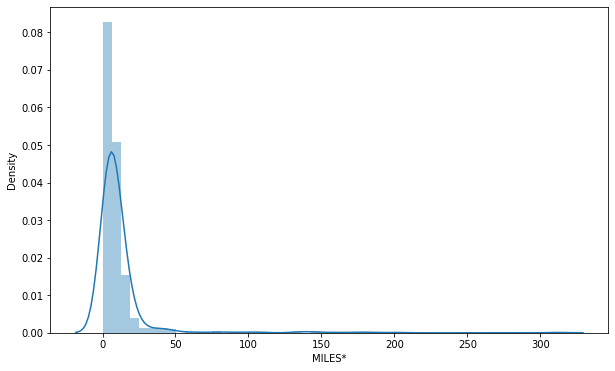

In [17]:
# Displot of Miles 
plt.figure(figsize=(10,6))
sns.distplot(uber_df["MILES*"])
plt.show()

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Destination(Starting and Stopping)</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>



In [18]:
# Get the starting destination, unique destination
print(uber_df['START*'].unique()) #names of unique start points
print(len(uber_df['START*'].unique())) #count of unique start points

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh' 'Whitebridge'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Eastgate' 'East Elmhurst'
 'Long Island City' 'Katunayaka' 'Colombo' 'Nugegoda' 'Unknown Location'
 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Preston' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Westpark Place' 'East Austin'
 'The Drag' 'South Congress' 'Georgian Acres' 'North Austin'
 'West University' 'Austin' 'Katy' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Briar Meadow' 'Latta' 'Jacksonville'
 'Lake Reams' 'Orlando' 'Kissimmee' 'Daytona Beach' 'Ridgeland' 'Florence'
 'Meredith' 'Holly Springs' 'Chessingt

**There are 131 unique starting points in the dataset**

In [19]:
# Get the starting destination, unique destination
print(uber_df['STOP*'].unique()) #names of unique start points
print(len(uber_df['STOP*'].unique())) #count of unique start points

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place' 'Meredith Townes'
 'Leesville Hollow' 'Apex' 'Chapel Hill' 'Williamsburg Manor'
 'Macgregor Downs' 'Edgehill Farms' 'Walnut Terrace' 'Midtown West'
 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo' 'Nugegoda'
 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Northwoods'
 'Depot Historic District' 'West University' 'Congress Ave District'
 'Convention Center District' 'North Austin' 'The Drag' 'Coxville'
 'South Congress' 'Katy' 'Alief' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Greater Greenspoint' 'Latta'
 'Jacksonville' 'Kissimmee' 'Lake Reams' 'Orlando' 'D

**There are 137 unique destinations in the datset**

In [20]:
#Identify popular start destinations - top 10
uber_df['START*'].value_counts().head(10)

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               29
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Midtown              11
Name: START*, dtype: int64

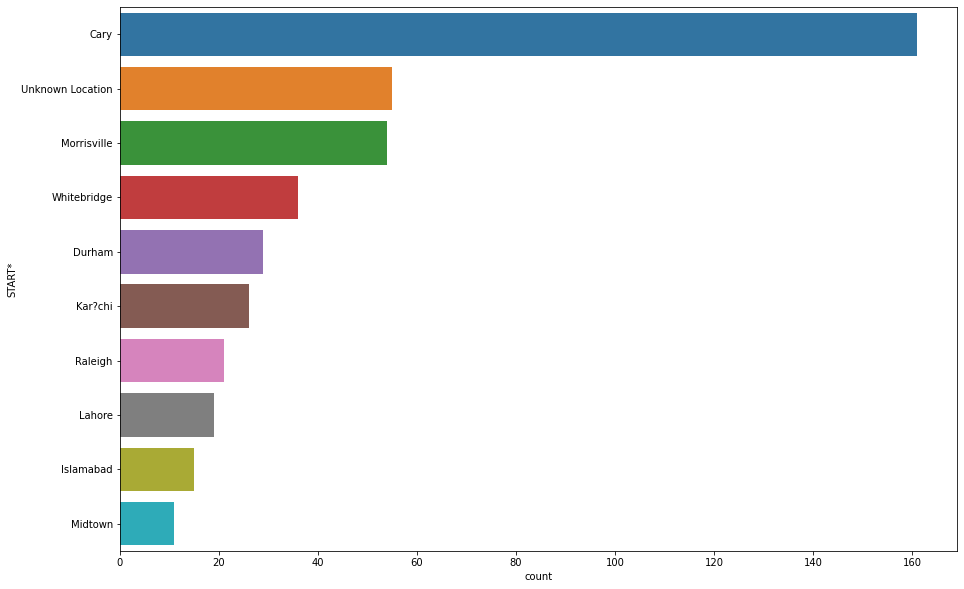

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(y="START*",order= pd.value_counts(uber_df['START*']).iloc[:10].index, data=uber_df)
plt.show()

**We can say that Cary is most poplular starting point for this driver.**

In [22]:
#Identify popular stop destinations - top 10
uber_df['STOP*'].value_counts().head(10)

Cary                154
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            14
Apex                 11
Name: STOP*, dtype: int64

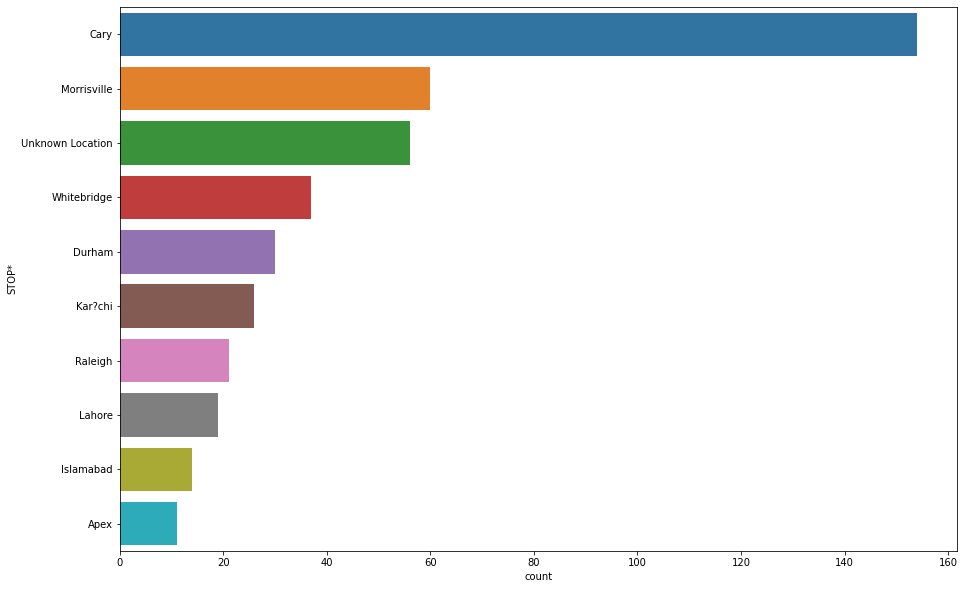

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(y="STOP*",order= pd.value_counts(uber_df['STOP*']).iloc[:10].index, data=uber_df)
plt.show()

**Cary also features in the most popular stop destinations**

In [24]:
#Find out most farthest start and stop pair -top10
#Dropping Unknown Location Value
uber_df2 = uber_df[uber_df['START*']!= 'Unknown Location']
uber_df2 = uber_df2[uber_df2['STOP*']!= 'Unknown Location']

uber_df2.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False).head(10)

START*        STOP*       
Cary          Durham          312.3
Latta         Jacksonville    310.3
Cary          Morrisville     293.7
Durham        Cary            288.5
Raleigh       Cary            269.5
Morrisville   Cary            250.6
Cary          Cary            233.9
              Raleigh         230.4
Jacksonville  Kissimmee       201.0
Boone         Cary            180.2
Name: MILES*, dtype: float64

**Cary and Durham are the farthest from each other**

In [25]:
#Find out most popular start and stop pair - top10
uber_df2.groupby(['START*','STOP*']).size().sort_values(ascending=False).head(10)

START*       STOP*      
Cary         Morrisville    52
Morrisville  Cary           51
Cary         Cary           44
             Durham         30
Durham       Cary           28
Kar?chi      Kar?chi        20
Cary         Raleigh        17
Lahore       Lahore         16
Raleigh      Cary           15
Cary         Apex           11
dtype: int64

**Cary and Durham are the farthest from each other**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


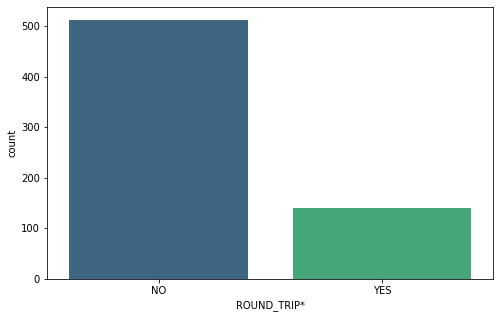

In [26]:
# For this purpose, we need to make a function
plt.figure(figsize=(8,5))
def round(x):
    if x['START*'] == x['STOP*']:
        return 'YES'
    else:
        return 'NO'
    
uber_df['ROUND_TRIP*'] = uber_df.apply(round, axis=1)

sns.countplot(uber_df['ROUND_TRIP*'], order=uber_df['ROUND_TRIP*'].value_counts().index, palette='viridis')
plt.show()

**No of round trips is less**

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3.Exploring date and time object</b></font>



In [27]:
# Convert the START DATE and END_DATE in string format to datetime object

uber_df.loc[:, 'START_DATE*'] = uber_df['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
uber_df.loc[:, 'END_DATE*'] = uber_df['END_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [28]:
#Calculate the duration for the rides
uber_df['DIFF'] = uber_df['END_DATE*'] - uber_df['START_DATE*']

In [29]:
#convert duration to numbers(minutes)
uber_df.loc[:, 'DIFF'] = uber_df['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [30]:
uber_df['DIFF'].head()

0     6.0
2    13.0
3    14.0
4    67.0
5     4.0
Name: DIFF, dtype: float64

In [31]:
uber_df['DIFF'].describe()

count    652.000000
mean      23.395706
std       25.789348
min        2.000000
25%       11.000000
50%       17.500000
75%       28.000000
max      330.000000
Name: DIFF, dtype: float64

**Ride durations range from 2 minutes to 330 minutes with an average duration of 23 minutes**

In [32]:
#Capture Hour, Day, Month and Year of Ride in a separate column
uber_df['month'] = pd.to_datetime(uber_df['START_DATE*']).dt.month
uber_df['Year'] = pd.to_datetime(uber_df['START_DATE*']).dt.year
uber_df['Day'] = pd.to_datetime(uber_df['START_DATE*']).dt.day
uber_df['Hour'] = pd.to_datetime(uber_df['START_DATE*']).dt.hour

In [33]:
#Capture day of week and rename to weekday names
uber_df['day_of_week'] = pd.to_datetime(uber_df['START_DATE*']).dt.dayofweek
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

uber_df['day_of_week'] = uber_df['day_of_week'].apply(lambda x: days[x])

In [34]:
#Rename the numbers in the Month column to calendar months
import calendar
uber_df['month'] = uber_df['month'].apply(lambda x: calendar.month_abbr[x])
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUND_TRIP*,DIFF,month,Year,Day,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,6.0,Jan,2016,1,21,Fri
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,13.0,Jan,2016,2,20,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,14.0,Jan,2016,5,17,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,67.0,Jan,2016,6,14,Wed
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,YES,4.0,Jan,2016,6,17,Wed


In [35]:
#Extract the total number of trips per month, weekday
print(uber_df['month'].value_counts())
print(uber_df['day_of_week'].value_counts())

Dec    134
Feb     82
Jun     72
Mar     71
Nov     60
Jan     59
Apr     50
Jul     46
May     46
Oct     20
Aug     12
Name: month, dtype: int64
Fri     125
Tue      93
Thur     92
Sun      87
Mon      87
Wed      85
Sat      83
Name: day_of_week, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


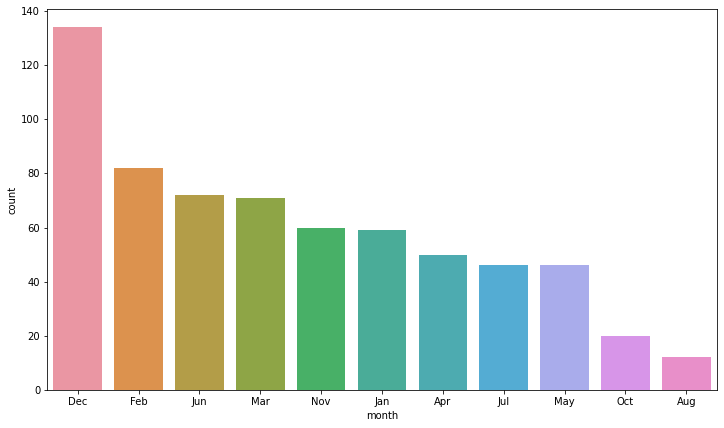

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['month'],order=pd.value_counts(uber_df['month']).index)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


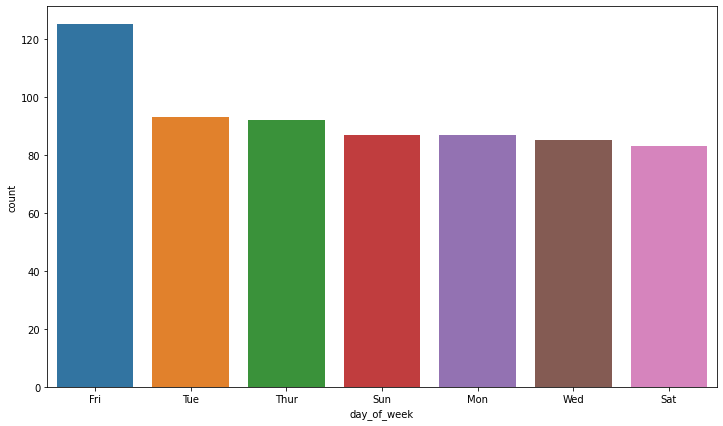

In [37]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['day_of_week'],order=pd.value_counts(uber_df['day_of_week']).index)
plt.show()

In [38]:
#Getting the average distance covered per month
uber_df.groupby('month').mean()['MILES*'].sort_values(ascending = False)

month
Oct    24.840000
Apr    21.898000
Mar    20.505634
Jul    10.615217
Nov    10.590000
Feb     8.868293
Jan     8.486441
May     7.793478
Jun     7.376389
Aug     7.341667
Dec     6.898507
Name: MILES*, dtype: float64

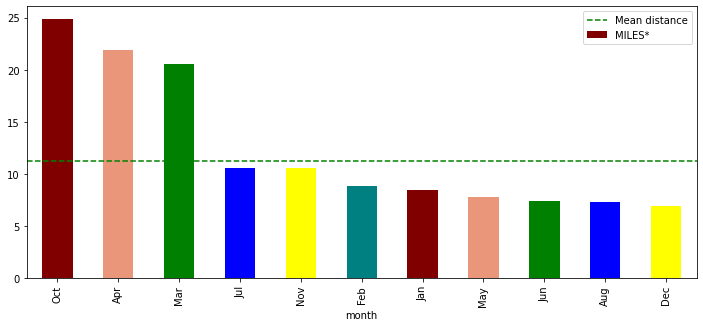

In [39]:
plt.figure(figsize=(12,5))
uber_df.groupby('month').mean()['MILES*'].sort_values(ascending = False).plot.bar(color=['maroon','darksalmon','green','blue','yellow','teal'])
plt.axhline(uber_df['MILES*'].mean(), linestyle='--', color='green', label='Mean distance')
plt.legend()
plt.show()

**Longest average distance is covered in Oct and least in Dec**

In [40]:
#Number of trips based of hour of day
uber_df['Hour'].value_counts()

13    55
14    52
15    51
18    51
17    51
20    45
16    45
12    43
11    39
19    35
21    34
10    33
9     26
22    21
23    20
8     17
0     13
7      8
1      4
5      3
3      3
6      2
2      1
Name: Hour, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


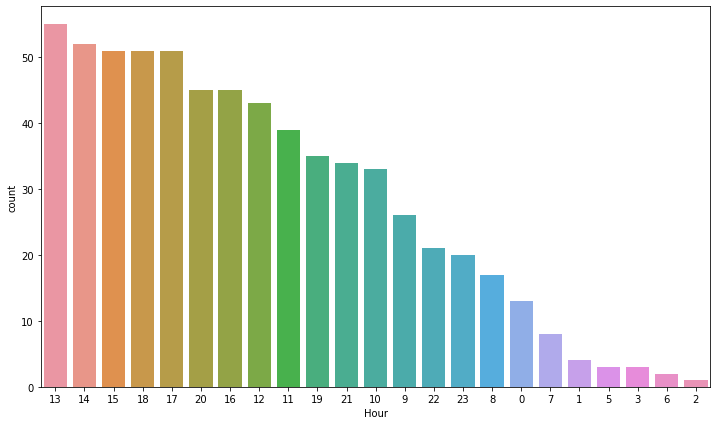

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['Hour'],order=pd.value_counts(uber_df['Hour']).index)
plt.show()

**Afternoons and evenings seem to have the maximum number of trips**

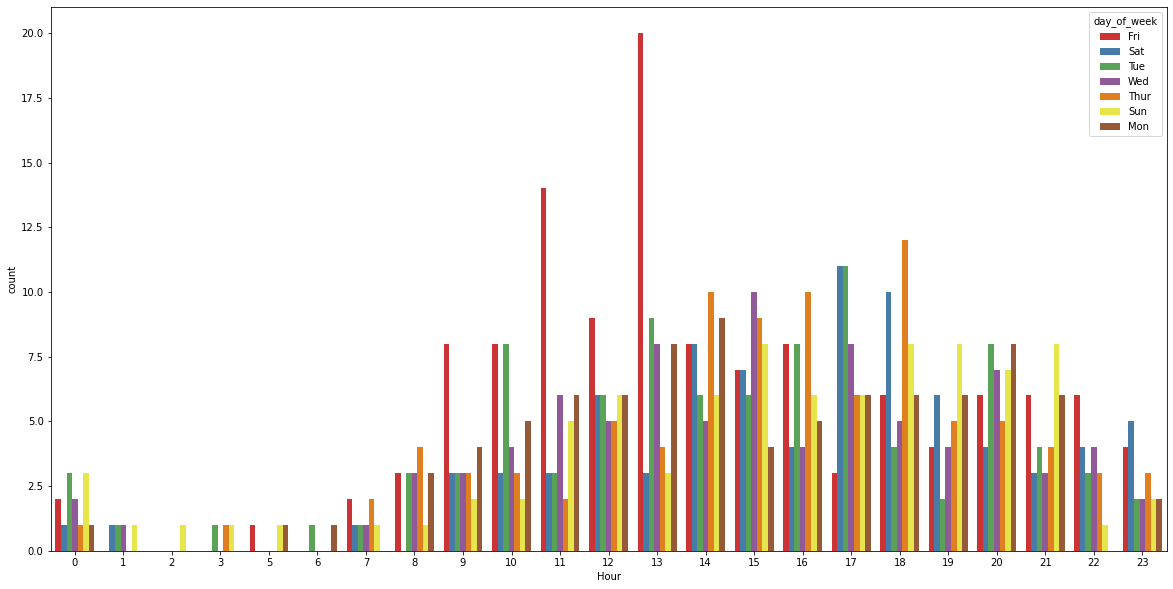

In [42]:
#which hours of the day highest trips are made

plt.figure(figsize=(20,10))
sns.countplot(data=uber_df, x=uber_df['Hour'], hue=uber_df['day_of_week'],
              palette="Set1", )
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


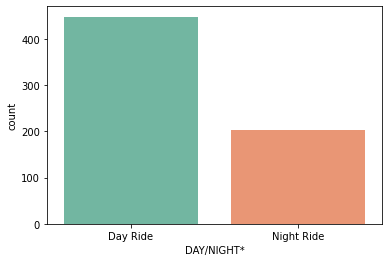

In [43]:
# Day Time or Night time 
a = pd.to_datetime(['18:00:00']).time
uber_df['DAY/NIGHT*'] = uber_df.apply(lambda x : 'Night Ride' if x['START_DATE*'].time() > a else 'Day Ride', axis=1)
sns.countplot(uber_df['DAY/NIGHT*'], palette='Set2' , order = uber_df['DAY/NIGHT*'].value_counts().index)
plt.show()

**Maximum trips were made during Day Time**


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


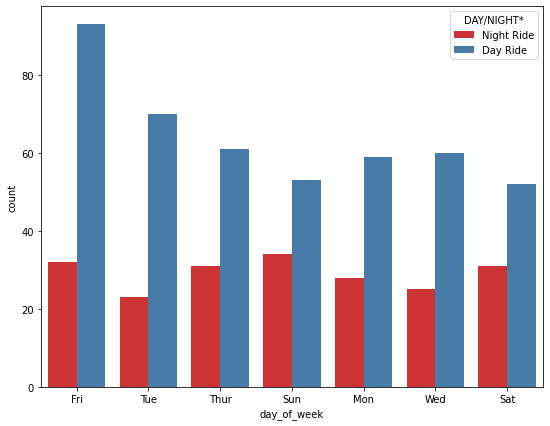

In [44]:
plt.figure(figsize=(9,7))
sns.countplot(uber_df['day_of_week'], hue=uber_df['DAY/NIGHT*'], palette='Set1' ,
              order=uber_df['day_of_week'].value_counts().index)
plt.show()

**Highest number of Day rides were on Friday while Night rides were on Sunday/Thursday**


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


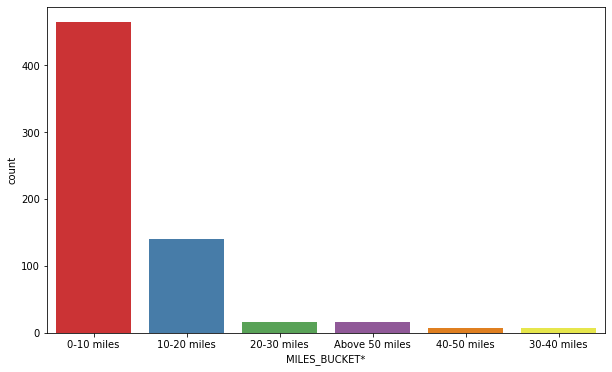

In [45]:
m = {}

for i in uber_df['MILES*']:
    for i in uber_df['MILES*']:
        if i < 10:
            m.setdefault(i,'0-10 miles')
        elif i >= 10 and i < 20:
            m.setdefault(i,'10-20 miles')
        elif i >= 20 and i < 30:
            m.setdefault(i,'20-30 miles')
        elif i >= 30 and i < 40:
            m.setdefault(i,'30-40 miles')
        elif i >= 40 and i < 50:
            m.setdefault(i,'40-50 miles')
        else:
            m.setdefault(i,'Above 50 miles')
            
uber_df['MILES_BUCKET*'] = uber_df['MILES*'].map(m)

plt.figure(figsize=(10,6))
sns.countplot(uber_df['MILES_BUCKET*'], palette='Set1' ,
              order = uber_df['MILES_BUCKET*'].value_counts().index)
plt.show()

**One can see that there are more number of short distanced trips**


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


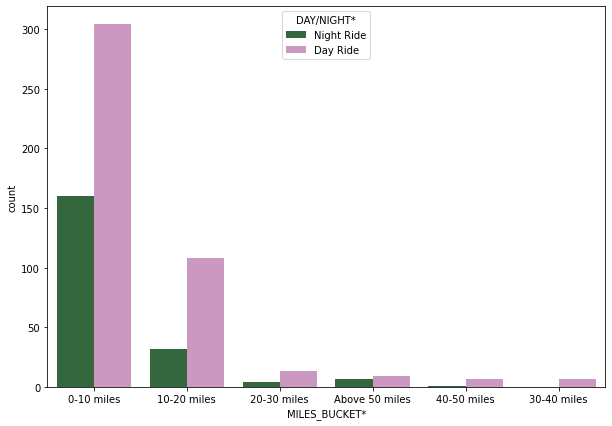

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(uber_df['MILES_BUCKET*'], hue=uber_df['DAY/NIGHT*'], palette='cubehelix',
              order = uber_df['MILES_BUCKET*'].value_counts().index)
plt.show()

**Both highest number of Day and Night Rides were below 10miles of a distance**

In [47]:
# calculate trip speed for each trip
uber_df['Duration_hours'] = uber_df['DIFF'] / 60
uber_df['Speed_KM'] = uber_df['MILES*'] / uber_df['Duration_hours']
uber_df['Speed_KM'].describe()

count    652.000000
mean      25.263642
std       16.827915
min        6.000000
25%       16.553571
50%       22.219780
75%       29.120455
max      228.000000
Name: Speed_KM, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Speed_KM', ylabel='Density'>

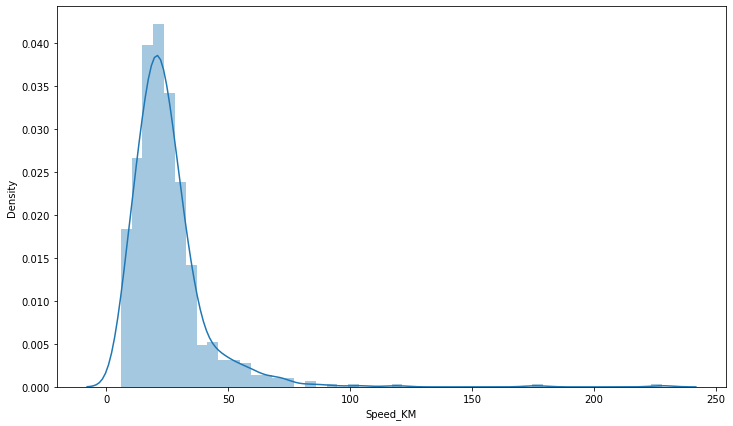

In [48]:
plt.figure(figsize=(12,7))
sns.distplot(uber_df['Speed_KM'])

**The average speed is little right skewed here**

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4.Category and Purpose </b></font>



In [49]:
uber_df['CATEGORY*'].value_counts()

Business    646
Personal      6
Name: CATEGORY*, dtype: int64

**Most trips are in the business category**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


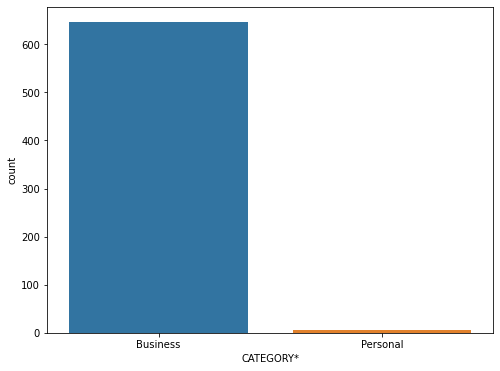

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(uber_df['CATEGORY*'])
plt.show()

In [51]:
#Purpose
uber_df['PURPOSE*'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

**Most trips are for meetings**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


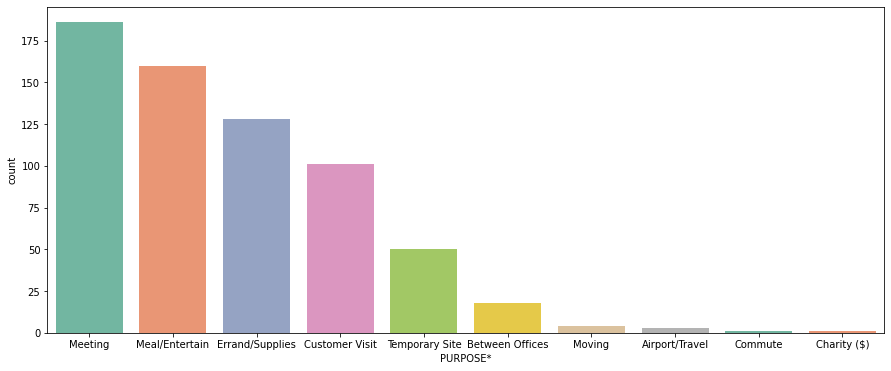

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(uber_df['PURPOSE*'], order=uber_df['PURPOSE*'].value_counts().index, palette='Set2')
plt.show()

In [53]:
#Average distance traveled for each activity
uber_df.groupby('PURPOSE*').mean()['MILES*'].sort_values(ascending = False)

PURPOSE*
Commute            180.200000
Customer Visit      20.688119
Meeting             15.276344
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES*, dtype: float64

In [54]:
# How many miles was earned per category and purpose ?
uber_df.groupby('PURPOSE*').sum()['MILES*'].sort_values(ascending = False)

PURPOSE*
Meeting            2841.4
Customer Visit     2089.5
Meal/Entertain      911.7
Temporary Site      523.7
Errand/Supplies     508.0
Between Offices     197.0
Commute             180.2
Moving               18.2
Airport/Travel       16.5
Charity ($)          15.1
Name: MILES*, dtype: float64

In [55]:
#How many miles was earned per category and purpose ?
uber_df.groupby('CATEGORY*').sum()['MILES*'].sort_values(ascending = False)

CATEGORY*
Business    7087.8
Personal     213.5
Name: MILES*, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


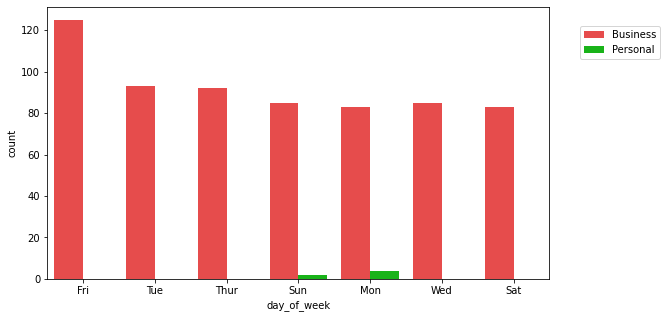

In [56]:
#Categorywise trip per day
plt.figure(figsize=(9,5))
a=sns.countplot(uber_df['day_of_week'],hue=uber_df['CATEGORY*'],palette=["#FF3333" ,"#00CC00"],
                order=uber_df['day_of_week'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


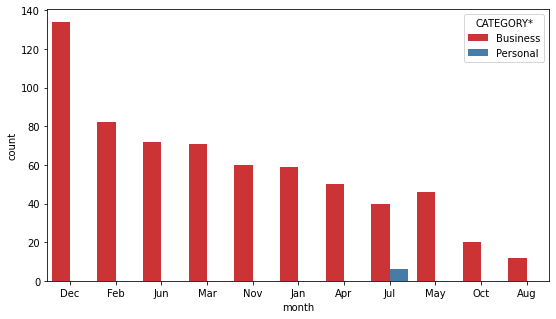

In [57]:
# Monthly Ride based on category
plt.figure(figsize=(9,5))
sns.countplot(uber_df['month'],hue=uber_df['CATEGORY*'],palette="Set1",
              order=uber_df['month'].value_counts().index)
plt.show()

<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5. Conclusion</b></font>


- The miles driven ranges from 0.5 miles to 12204 miles with an average of 21 miles
- There are 131 unique start destinations in the dataset
- There are 137 unique start destinations in the dataset
- Cary is most poplular starting point for this driver.
- Cary also features in the most popular stop destinations
- Cary and Durham are the farthest from each other
- The most popular start to destination pair is Cary-Morrisville
- Ride durations range from 2 minutes to 330 minutes with an average duration of 23 minutes
- December has maximum number of trips and August has the least
- Friday has the maximum number of trips
- Longest average distance is covered in Oct and least in Dec
- Afternoons and evenings seem to have the maximum number of trips
- Most trips are in the business category
- Most trips are for meetings
- There are more number of short distanced trips
- There are more number of day trips
- Both highest number of Day and Night Rides were below 10miles of a distance
- Highest number of Day rides were on Friday while Night rides were on Sunday/Thursday